In [1]:
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pickle

In [2]:
db = pd.read_csv("Preprocessing/data.csv", delimiter=";")
sentences = db['Texte']
languages = db['Langue']
language = set(db.Langue.values)

In [3]:
def precision_rappel_fmes(prediction, test_class):
    """
    Calcule la précision, le rappel et la f-mesure pour chaque langue
    :param prediction : les prédictions faites par le classifieur
    :param test_class : les valeurs cibles
    """

    pre_rap = {}

    list_precision = []
    list_rappel = []

    for i, element in enumerate(test_class):
        if prediction[i] == element:
            pre_rap[element] = pre_rap.get(element, 0) + 1 # nombre de fois que la langue d'une phrase a bien été prédite
    # calcul de la précision
    for classe in pre_rap:
        score = pre_rap[classe] / len([x for x in prediction if x == classe])
        list_precision.append(score)
        print(f"précision {classe}: {score}")

    print()
    # calcul du rappel
    for classe in pre_rap:
        score = pre_rap[classe] / len([x for x in test_class if x == classe])
        list_rappel.append(score)
        print(f"rappel {classe}: {score}")

    print()
    # calcul de la f-mesure
    for classe, precision, rappel in zip(pre_rap, list_precision, list_rappel):
        f_mesure = 2*precision*rappel / (precision+rappel)
        print(f"f-mesure {classe}: {f_mesure}")

In [4]:
def matrix_confusion(y_test, y_pred):
    """
    Créée la matrice de confusion à partir des prédictions du classifieur et des valeurs cibles
    :param y_test : valeurs cibles
    :param y_pred : valeur prédite
    """

    cm = confusion_matrix(y_target=y_test, y_predicted=y_pred) # instanciation d'un objet matrice

    fig, ax = plt.subplots(figsize=(20, 20)) # fixe la taille
    plot_confusion_matrix(conf_mat=cm, cmap=plt.cm.YlGn, class_names=set(y_test), axis=ax) # création de la matrice
    plt.show() # affichage de la matrice


In [5]:
x_train, x_test, y_train, y_test = train_test_split(sentences, languages, random_state=42, test_size=0.1)

# instanciation des outils de vectorisation
tf_idf = TfidfVectorizer(ngram_range=(3, 4), analyzer='char', max_features=3000, lowercase=True)
cv = CountVectorizer(ngram_range=(3, 4), analyzer='char', max_features=3000, lowercase=True)


Logistic Regression avec TFIDF
Accuracy is : 0.9909473684210526
précision danish: 0.9930921052631579
précision slovenian: 0.9849498327759197
précision polish: 0.9926739926739927
précision italian: 0.9950884086444007
précision hungarian: 0.9960552268244576
précision croatian: 0.9846153846153847
précision french: 0.9949272911734867
précision dutch: 0.9976407145264578
précision icelandic: 0.9662809917355372
précision swedish: 0.9939003727549983
précision spanish: 0.9937928781443972
précision finnish: 0.9957053187974892
précision latvian: 0.9948569591771135
précision german: 0.9972489683631361
précision romanian: 0.9972927241962775
précision estonian: 0.991869918699187
précision portuguese: 0.9947019867549669
précision slovak: 0.9777998674618953
précision english: 0.9856379425517702

rappel danish: 0.9953841081437521
rappel slovenian: 0.9842914438502673
rappel polish: 0.9900365327133842
rappel italian: 0.995740498034076
rappel hungarian: 0.996382768826044
rappel croatian: 0.982264665757162

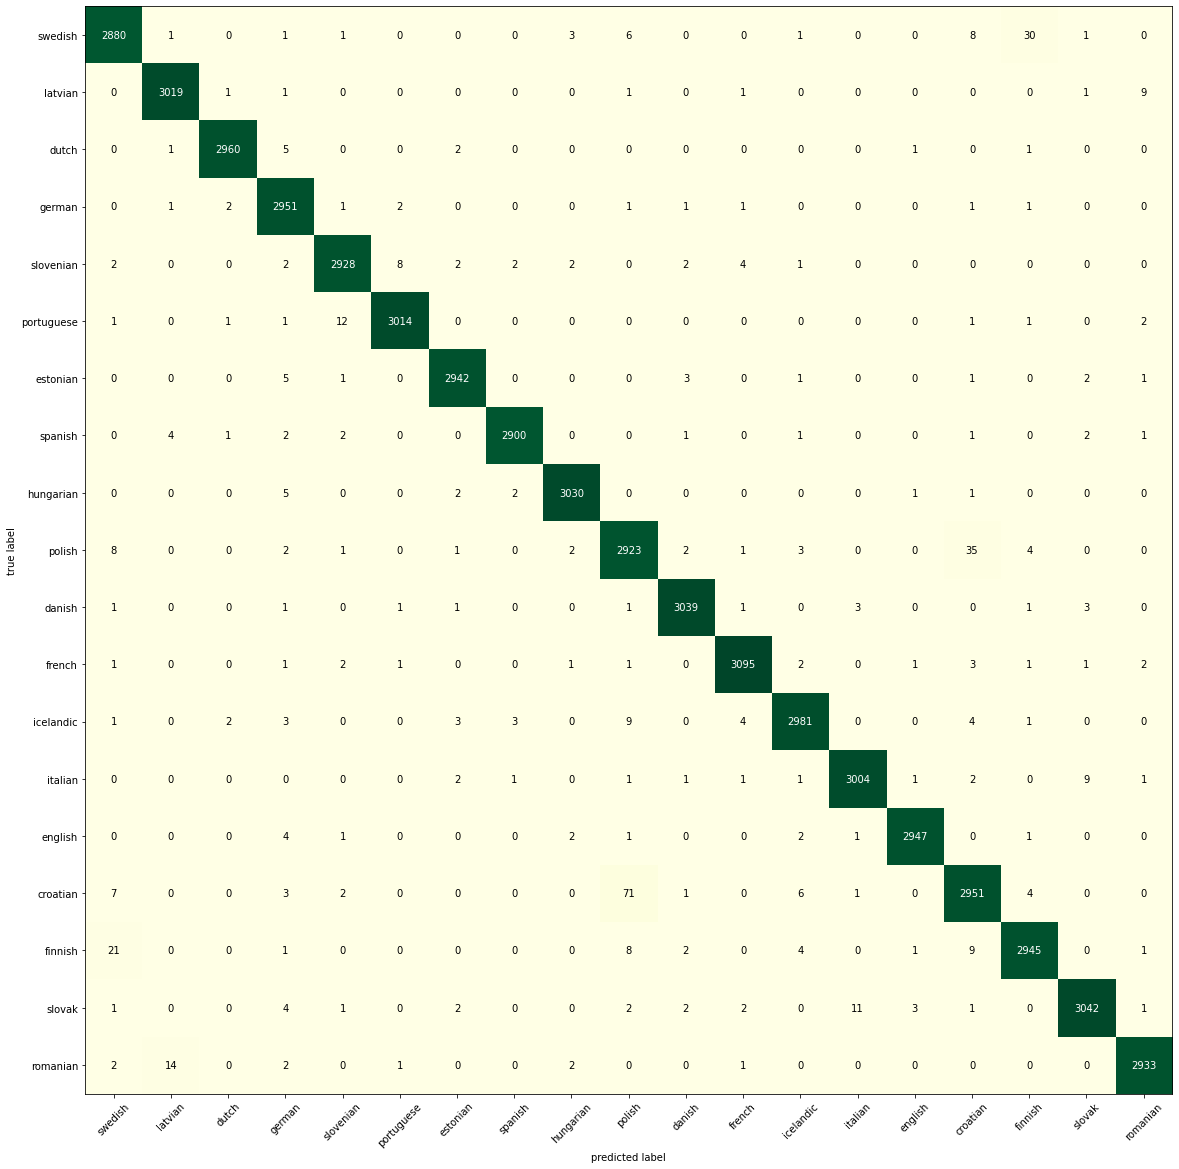

['italian']


In [6]:
print("Logistic Regression avec TFIDF")
lrt = pipeline.Pipeline([('vectorizer', tf_idf), ('clf', LogisticRegression(max_iter=1000))])

lrt.fit(x_train, y_train) # entrainement du modèle sur le corpus d'entraînement

lrt_pred = lrt.predict(x_test) # prédiction des phrases du corpus de test

with open("model_lr-tfidf", "wb") as f:
    pickle.dump(lrt, f)

accuracy = accuracy_score(y_test, lrt_pred) # calcul de l'exactitude des prédictions du modèle

print(f"Accuracy is : {accuracy}")
precision_rappel_fmes(lrt_pred, y_test) # calcul précision, rappel, f-mesure
matrix_confusion(y_test, lrt_pred) # création matrice de confusion

do_test = input("Voulez faire un test avec ce modèle ? y/n ")
if do_test.lower() == "y":
    yn = True
    while yn:
        sent_to_test = str(input("Entrez une phrase dans une langue de votre choix : "))
        print(lrt.predict([sent_to_test]))
        yn = input("Voulez-vous tester une autre phrase ? y/n ")
        if yn.lower() == "n":
            yn = False
        else:
            continue
else:
    pass

Accuracy is : 0.9913157894736843
précision danish: 0.9943894389438944
précision slovenian: 0.9852793576446972
précision polish: 0.9906976744186047
précision italian: 0.995736306985897
précision hungarian: 0.9954038082731451
précision croatian: 0.9829293274155002
précision french: 0.995605138607167
précision dutch: 0.9976415094339622
précision icelandic: 0.972
précision swedish: 0.9932409597837107
précision spanish: 0.9921773142112125
précision finnish: 0.9957109864731112
précision latvian: 0.9942270686337396
précision german: 0.9969093406593407
précision romanian: 0.9959432048681541
précision estonian: 0.9959183673469387
précision portuguese: 0.9950248756218906
précision slovak: 0.9769509384260784
précision english: 0.9892725444183708

rappel danish: 0.9934058687767886
rappel slovenian: 0.9842914438502673
rappel polish: 0.9903686482896048
rappel italian: 0.9947575360419397
rappel hungarian: 0.9970404472213088
rappel croatian: 0.9819236016371078
rappel french: 0.9962787550744249
rappel 

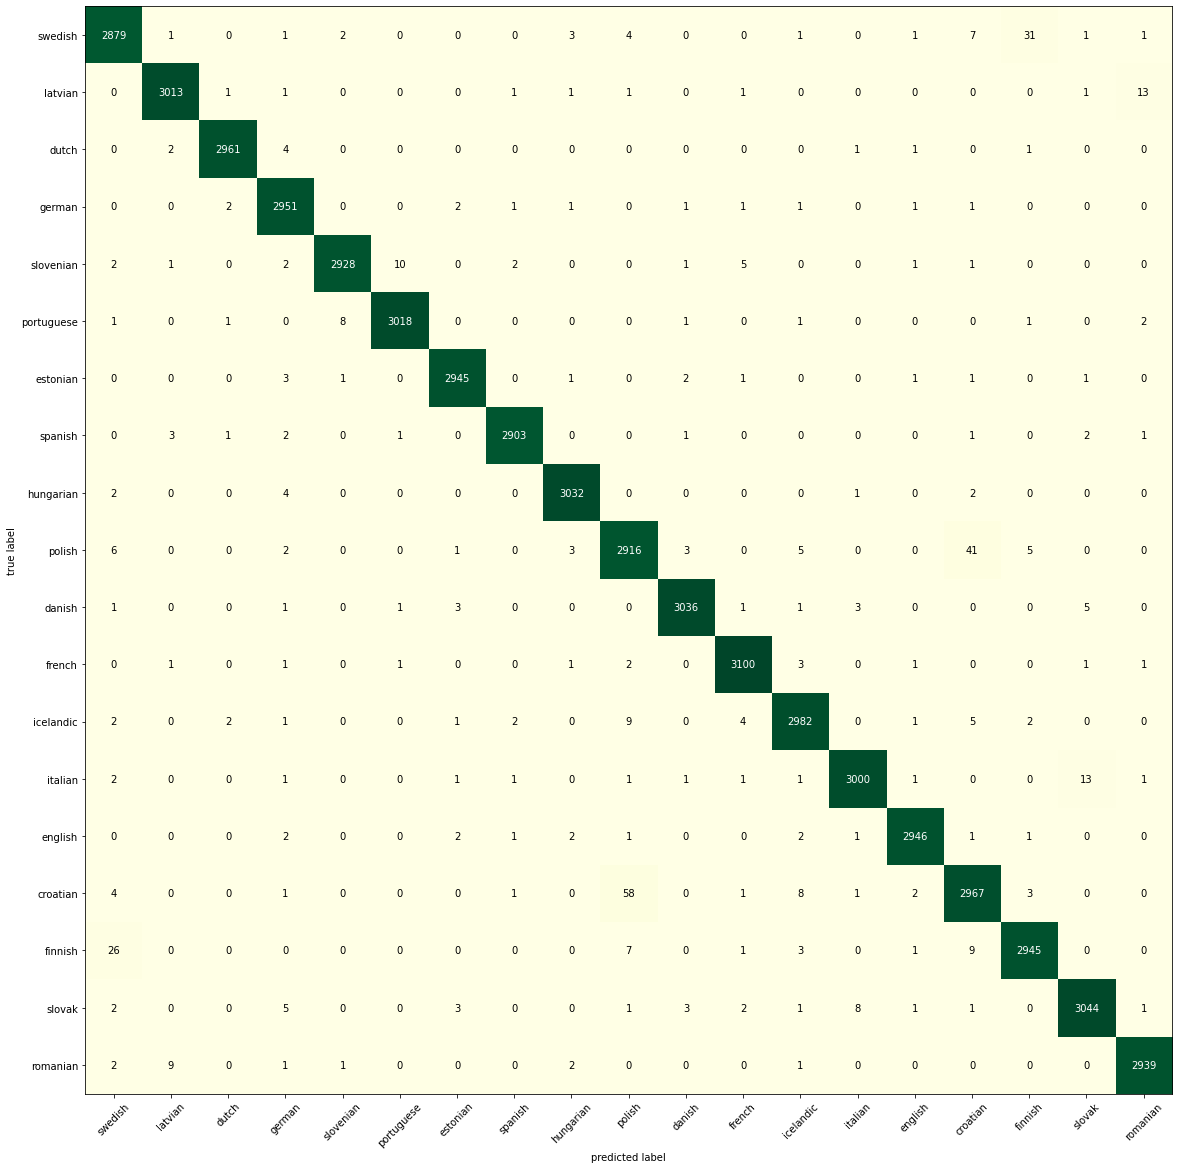

['english']
['french']


In [7]:
print("Logistic Regression avec CountVectorizer")
lrcv = pipeline.Pipeline([('vectorizer', cv), ('clf', LogisticRegression(max_iter=1000))])

lrcv.fit(x_train, y_train) # entrainement du modèle sur le corpus d'entraînement

lrcv_pred = lrcv.predict(x_test) # prédiction des phrases du corpus de test

with open("model_lr-cv", "wb") as f:
    pickle.dump(lrcv, f)

accuracy = accuracy_score(y_test, lrcv_pred) # calcul de l'exactitude des prédictions du modèle
print(f"Accuracy is : {accuracy}")

precision_rappel_fmes(lrcv_pred, y_test) # calcul précision, rappel, f-mesure
matrix_confusion(y_test, lrcv_pred) # création matrice de confusion

do_test = input("Voulez faire un test avec ce modèle ? y/n ")
if do_test.lower() == "y":
    yn = True
    while yn:
        sent_to_test = str(input("Entrez une phrase dans une langue de votre choix : "))
        print(lrcv.predict([sent_to_test]))
        yn = input("Voulez-vous tester une autre phrase ? y/n ")
        if yn.lower() == "n":
            yn = False
        else:
            continue
else:
    pass

Naive Bayes avec TFIDF
Accuracy is : 0.9718947368421053
précision danish: 0.968026101141925
précision slovenian: 0.94994994994995
précision polish: 0.9817578772802653
précision italian: 0.9869067103109657
précision hungarian: 0.9878169245966414
précision croatian: 0.9468907563025211
précision french: 0.9874106839060905
précision dutch: 0.9723425524825058
précision icelandic: 0.9301075268817204
précision swedish: 0.9644653033858531
précision spanish: 0.9842622950819672
précision finnish: 0.9916555407209613
précision latvian: 0.9925494007126661
précision german: 0.9830742659758204
précision romanian: 0.9871708305199189
précision estonian: 0.9736219141021305
précision portuguese: 0.9775947281713344
précision slovak: 0.9257425742574258
précision english: 0.9741935483870968

rappel danish: 0.9782393669634025
rappel slovenian: 0.9515374331550802
rappel polish: 0.9830621056127532
rappel italian: 0.9878768020969856
rappel hungarian: 0.9865175928970733
rappel croatian: 0.9607776261937244
rappel

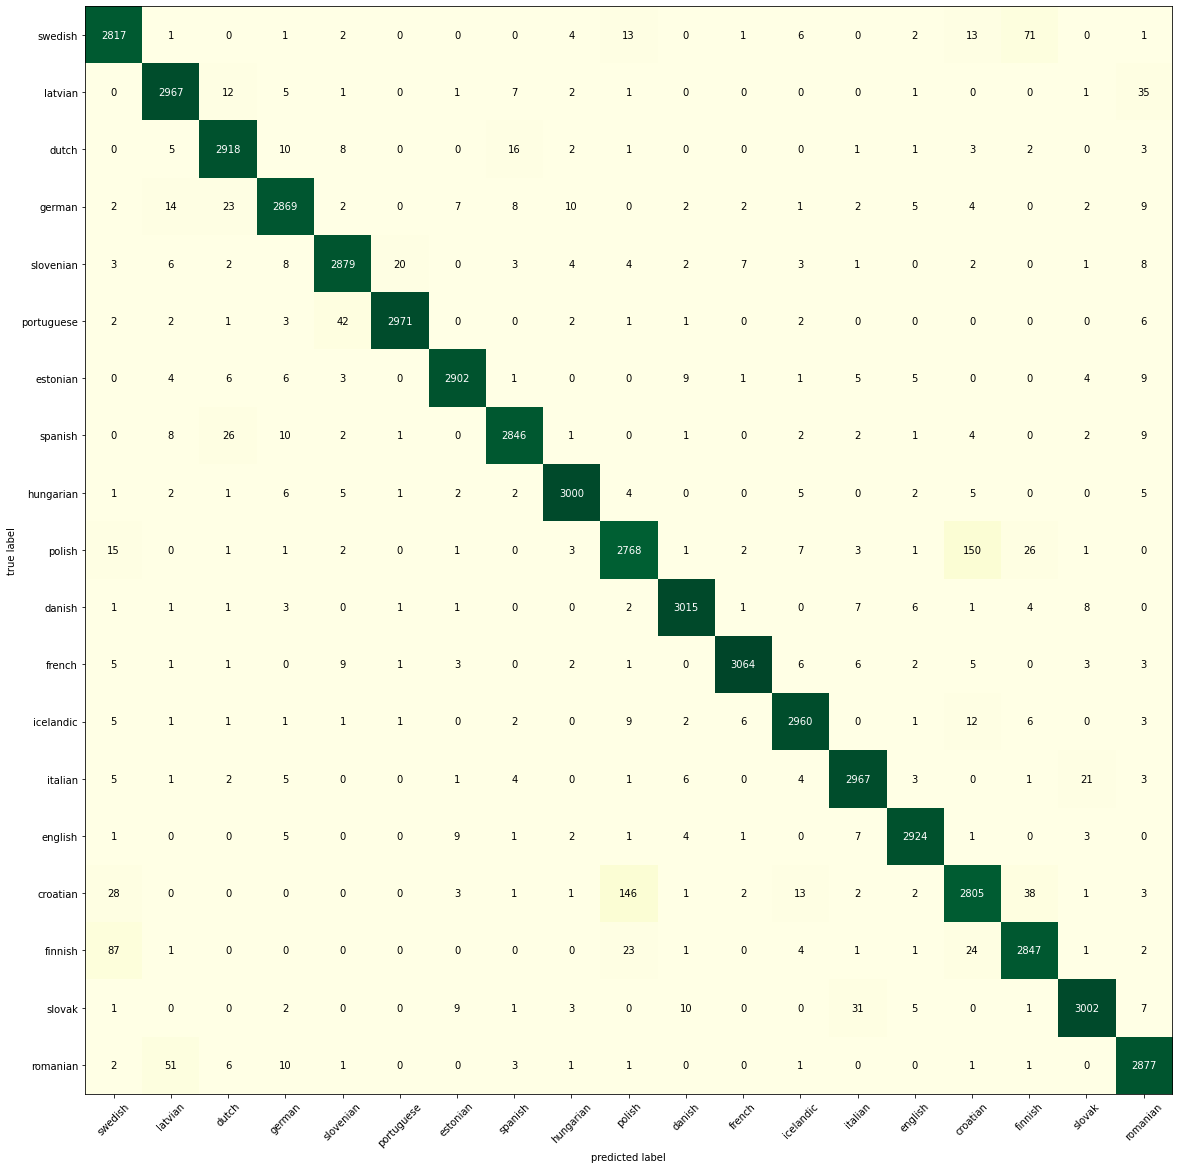

['english']


In [8]:
print("Naive Bayes avec TFIDF")
clf_tfidf = GaussianNB() # instanciation du classifieur

x_train_tfidf = tf_idf.fit_transform(x_train) # création matrice terme-document + apprentissage vocabulaire
clf_tfidf.fit(x_train_tfidf.toarray(), y_train) # entraînement du classifieur avec la matrice terme-document et les valeurs cibles
x_test_tfidf = tf_idf.transform(x_test) # transformation du corpus de test en matrice terme-document
y_pred_tfidf = clf_tfidf.predict(x_test_tfidf.toarray()) # génération des prédictions

with open("model_nb-tfidf", "wb") as f:
    pickle.dump(clf_tfidf, f)

accuracy = accuracy_score(y_test, y_pred_tfidf) # calcul de l'exactitude des prédictions du modèle
print(f"Accuracy is : {accuracy}")

precision_rappel_fmes(y_pred_tfidf, y_test) # calcul précision, rappel, f-mesure
matrix_confusion(y_test, y_pred_tfidf) # création matrice de confusion

do_test = input("Voulez faire un test avec ce modèle ? y/n ")
if do_test.lower() == "y":
    yn = True
    while yn:
        sent_to_test = str(input("Entrez une phrase dans une langue de votre choix : "))
        print(clf_tfidf.predict(tf_idf.transform([sent_to_test]).toarray()))
        yn = input("Voulez-vous tester une autre phrase ? y/n ")
        if yn.lower() == "n":
            yn = False
        else:
            continue
else:
    pass

Naive Bayes avec CountVectorizer
Accuracy is : 0.9675087719298245
précision danish: 0.9713155291790306
précision polish: 0.9481931563799169
précision italian: 0.9881500987491771
précision hungarian: 0.9801173402868318
précision croatian: 0.9391686380533965
précision french: 0.984083982390789
précision dutch: 0.974581939799331
précision icelandic: 0.9067741935483871
précision swedish: 0.9729821006416751
précision spanish: 0.9828382838283828
précision finnish: 0.963777490297542
précision latvian: 0.9814340588988476
précision german: 0.9804123711340206
précision romanian: 0.9884510869565217
précision estonian: 0.9784122562674095
précision slovenian: 0.963091922005571
précision portuguese: 0.9702711532179027
précision slovak: 0.9414984604858022
précision english: 0.9690791709140333

rappel danish: 0.9713155291790306
rappel polish: 0.9847226834938558
rappel italian: 0.9836173001310616
rappel hungarian: 0.9888194672804999
rappel croatian: 0.9478171896316507
rappel french: 0.983085250338295
r

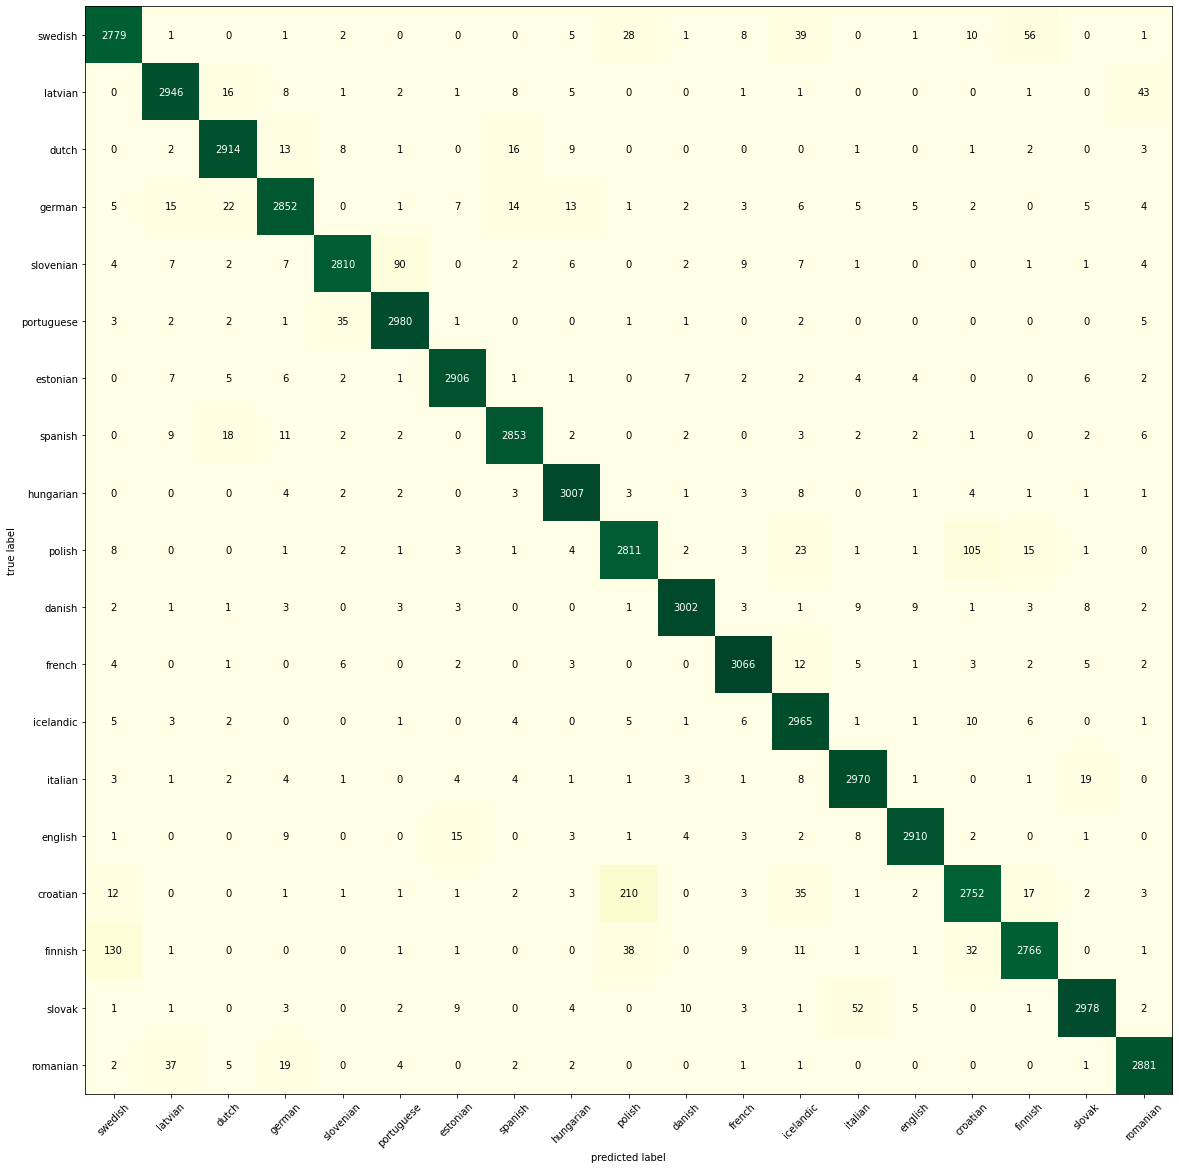

['french']


In [9]:
print("Naive Bayes avec CountVectorizer")

clf_cv = GaussianNB()

x_train_cv = cv.fit_transform(x_train) # création matrice terme-document + apprentissage vocabulaire
clf_cv.fit(x_train_cv.toarray(), y_train) # entraînement du classifieur avec la matrice terme-document et les valeurs cibles
x_test_cv = cv.transform(x_test) # transformation du corpus de test en matrice terme-document
y_pred_cv = clf_cv.predict(x_test_cv.toarray()) # génération des prédictions

with open("model_nb-cv", "wb") as f:
    pickle.dump(clf_cv, f)

accuracy = accuracy_score(y_test, y_pred_cv)# calcul de l'exactitude des prédictions du modèle
print(f"Accuracy is : {accuracy}")

precision_rappel_fmes(y_pred_cv, y_test) # calcul précision, rappel, f-mesure
matrix_confusion(y_test, y_pred_cv) # création matrice de confusion

do_test = input("Voulez faire un test avec ce modèle ? y/n ")
if do_test.lower() == "y":
    yn = True
    while yn:
        sent_to_test = str(input("Entrez une phrase dans une langue de votre choix : "))
        print(clf_cv.predict(cv.transform([sent_to_test]).toarray()))
        yn = input("Voulez-vous tester une autre phrase ? y/n ")
        if yn.lower() == "n":
            yn = False
        else:
            continue
else:
    pass